# Locations and distance to landmarks in Ames

For the descriptive section of our project we are interested on how close the houses are to areas of potential interest for the tourists. These areas include the Stadium of the Iowa State University, Downtown entertainment and restaurants, as well as the local Airport.

To obtain the location of each house we need the Real Estate Data

In [2]:
import pandas as pd
import numpy as np


realE_df = pd.read_csv('../data/Ames_Real_Estate_Data.csv', index_col=0, low_memory=False)
realE_df.columns

Index(['GeoRefNo', 'Tier', 'Range', 'Prop_Addr', 'ZngCdPr', 'ZngCdSc',
       'ZngOLPr', 'ZngOLSc', 'ClassPr_S', 'ClassSc_S', 'Legal_Pr', 'SchD_S',
       'TxD_S', 'MA_Ownr1', 'MA_Ownr2', 'MA_Line1', 'MA_Line2', 'MA_City',
       'MA_State', 'MA_Zip1', 'MA_Zip2', 'Rcrd_Yr', 'Rcrd_Mo', 'Inst1_No',
       'Inst1_Yr', 'Inst1_Mo', 'Inst1TPr', 'LndAc_S', 'ImpAc_S', 'OthAc_S',
       'TtlVal_AsrYr', 'ValType', 'X1TPr_D', 'X1TSc_D', 'X2TPr_D', 'X2TSc_D',
       'X1TPr_S', 'X1TSc_S', 'X2TPr_S', 'X2TSc_S', 'LndAcX1S', 'ImpAcX1S',
       'ImpAcX2S', 'HSTtl_D', 'MilVal_D', 'HSTtl_S', 'MilVal_S', 'AcreX_S1',
       'AcreGr', 'AcreNt_S', 'Neighborhood', 'LotArea', 'ParType', 'BldgNo_S',
       'DwlgNo_S', 'BldgType', 'YrBuilt', 'HouseStyle', 'Foundation',
       'RoofMatl', 'Ext1', 'Ext2', 'MasVnrType', 'Heating', 'Central Air',
       'GLA', 'TtlBsmtSF', 'TotRmsAbvGrd', 'Fireplaces', 'PoolArea',
       'GarageType', 'GarYrBlt', 'Cars', 'GarageArea', 'YrSold_YYYY',
       'MoSold_MM', 'SalePrice', 

In [3]:
raw_data = pd.read_csv('../data/Ames_Housing_Price_Data.csv', index_col=0)

We merge the two data sets on PID/MapRefNo columns

In [4]:
full_df = pd.merge(
    raw_data,
    realE_df,
    how="left",
    left_on='PID',
    right_on='MapRefNo',
    sort=True,
    suffixes=("_x", "_y"),
    copy=False)

full_df.sample(10)

,PID,GrLivArea,SalePrice_x,MSSubClass,MSZoning,LotFrontage,LotArea_x,Street,Alley,LotShape,...,PA-Nmbr,PA-PreD,PA-Strt,PA-StSfx,PA-PostD,PA-UnTyp,PA-UntNo,Date,Source,NmbrBRs
1838,905478220,1480,136500,50,RL,60.0,11100,Pave,NaN,Reg,...,3123,NaN,STORY,ST,NaN,NaN,NaN,10-Jul-20,Ames City Assessor,4.0
406,528181060,1554,209500,120,RL,34.0,4590,Pave,NaN,Reg,...,2908,NaN,ROXBORO,DR,NaN,NaN,NaN,10-Jul-20,Ames City Assessor,2.0
2375,910200080,919,126000,30,RM,50.0,7000,Pave,NaN,Reg,...,121,S,RUSSELL,AVE,NaN,NaN,NaN,10-Jul-20,Ames City Assessor,2.0
2407,911104060,572,75000,30,C (all),60.0,10200,Pave,Grvl,Reg,...,317,NaN,WASHINGTON,AVE,NaN,NaN,NaN,10-Jul-20,Ames City Assessor,NaN
1979,907192030,1660,195000,60,RL,68.0,8935,Pave,NaN,IR1,...,5313,NaN,CLEMENS,BLVD,NaN,NaN,NaN,10-Jul-20,Ames City Assessor,3.0
889,534126090,1682,174000,20,RL,80.0,10400,Pave,NaN,Reg,...,2617,NaN,CLEVELAND,DR,NaN,NaN,NaN,10-Jul-20,Ames City Assessor,3.0
0,526301100,1656,215000,20,RL,141.0,31770,Pave,NaN,IR1,...,3126,NaN,NORTHWOOD,DR,NaN,NaN,NaN,10-Jul-20,Ames City Assessor,3.0
2538,923225240,1475,127000,160,RM,41.0,2665,Pave,NaN,Reg,...,3472,NaN,SOUTHDALE,DR,NaN,NaN,NaN,10-Jul-20,Ames City Assessor,4.0
1874,906225210,996,147000,85,RL,73.0,9069,Pave,NaN,Reg,...,913,NaN,DELAWARE,AVE,NaN,NaN,NaN,10-Jul-20,Ames City Assessor,2.0
1552,903231080,1136,123000,50,RM,52.0,6240,Pave,NaN,Reg,...,1023,NaN,MARSTON,AVE,NaN,NaN,NaN,10-Jul-20,Ames City Assessor,2.0


Use geopy to:
            1)Obtain the coordinates of each house
            2)Compute the Euclidean distances

In [28]:
import geopy
from geopy import Nominatim
from geopy.extra.rate_limiter import RateLimiter

locator = Nominatim(user_agent="myGeocoder")
geocode = RateLimiter(locator.geocode, min_delay_seconds=1.5)

full_geocodes =[geocode(addr+', Ames, IA , USA') if type(addr)==str else None for addr in full_df['Prop_Addr']] #don't run this unless you have a couple hours

In [111]:
full_coord = []
for i in range(0,len(full_geocodes)):
    try:
        coord = full_geocodes[i][1]
        
    except:
        coord = None
    
    full_coord.append(coord)

In [113]:
full_df["coord"] = full_coord

In [19]:
full_df = pd.read_csv('../data/full_wCoord.csv')
new = full_df["coord"].str.replace('(', '').str.replace(')', '').str.split(",", n = 1, expand = True)
full_df['lat']= new[0]
full_df['lon']= new[1]
full_df.sample()

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea_x,Street,Alley,LotShape,...,Date,Source,NmbrBRs,coord,dist_stadium,dist_downtown,dist_airport,PricePerSqft,lat,lon
1059,534477030,2136,137900,20,RL,89.0,10680,Pave,NaN,Reg,...,10-Jul-20,Ames City Assessor,4.0,"(42.03739596957785, -93.62268066172075)",2.589402,1.550593,4.270146,64.559925,42.03739596957785,-93.62268066172075


In [121]:
full_df['']
full_df['coord'].isnull().sum()

88

In [135]:

problem_addr = full_df[full_df['coord'].isnull()][['Prop_Addr']]
problem_addr['Prop_Addr'] = problem_addr['Prop_Addr'].str.lower()
problem_addr['Prop_Addr'] #I tried to get this addresses to work but could not

127                      1309 kinyon cir
128                      1303 kinyon cir
129                      1210 kinyon cir
130                      1316 kinyon cir
415                     3703 chilton ave
416                     3629 chilton ave
417                     3623 chilton ave
418                     3712 chilton ave
419                       3717 ashton dr
420                       3716 ashton dr
421                      3715 farnham dr
422                     3702 chilton ave
423                       3705 ashton dr
424                       3709 ashton dr
425                      3602 farnham dr
584                      2425 dalton cir
585                      2421 dalton cir
586                      2416 dalton cir
587                      2422 dalton cir
723                                  NaN
782                  2713 northridge cir
783                  2700 northridge cir
1151                                 NaN
1248                     201 e o neil dr
1249            

In [ ]:
ashton 419,420, 423, 424 -> 42.057356, -93.650371

In [ ]:
farhan 421,425 -> 42.056854, -93.650394

In [ ]:
dalton 84-87 ->42.054254, -93.641898

In [ ]:
782,783 -> 42.048357, -93.650409

In [ ]:
1248-1254 -> 42.039839, -93.608907

In [ ]:
1380 -> 42.030799, -93.620003

In [ ]:
1385 -> 42.030857, -93.618417

In [ ]:
1612, 1617, 1628-1630  -> 42.025958, -93.629303

In [ ]:
1673 -> 42.024277, -93.658482

In [ ]:
1773-1777 -> 42.024455, -93.674301

In [ ]:
franklin 1813-1817,1829-1830, 1794 -> 42.024899, -93.665210

In [ ]:
chilton 415-418,422 -> 42.057058, -93.651121

In [ ]:
kinion 127-130 -> 42.058917, -93.629018

In [ ]:
little bluestem 2353-2359, 2364-2366 -> 42.009682, -93.647182

In [34]:
print(geocode('1309 kinyon cir,  USA'))

Kinyon, Toole County, Montana, United States


Now determine the distances between each of the areas of interest and the houses

In [93]:
JackTriceStadium = '42.0162027, -93.6357060'
Downtown = '42.0251029, -93.6138075'
Airport = '41.9989524, -93.6223669'

In [184]:
from geopy import distance
dist_stadium = []
for co in range(0,len(full_geocodes)):
    if full_df.iloc[co]['coord'] is not None:
        dist = distance.distance(full_df.iloc[co]['coord'], JackTriceStadium ).km
    else:
        dist = None
    dist_stadium.append(dist)

In [185]:
dist_downtown = []
for co in range(0,len(full_geocodes)):
    if full_df.iloc[co]['coord'] is not None:
        dist = distance.distance(full_df.iloc[co]['coord'], Downtown ).km
    else:
        dist = None 
    dist_downtown.append(dist)

In [186]:
dist_airport = []
for co in range(0,len(full_geocodes)):
    if full_df.iloc[co]['coord'] is not None:
        dist = distance.distance(full_df.iloc[co]['coord'], Airport ).km
    else:
        dist = None 
    dist_airport.append(dist)

In [180]:
full_df['dist_stadium']= dist_stadium

In [187]:
full_df['dist_downtown']= dist_downtown

In [188]:
full_df['dist_airport']= dist_airport

In [159]:
full_df.rename(columns={"SalePrice_x": "SalePrice"}, inplace =True)

In [164]:
full_df['PricePerSqft'] = full_df['SalePrice']/full_df['GrLivArea']

In [189]:
full_df.to_csv(r'../data/full_wCoord.csv', index = False)

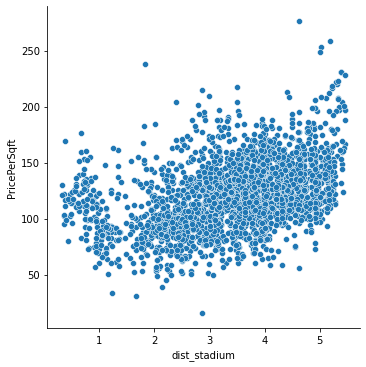

In [23]:
import seaborn as sns


sns.relplot(x="dist_stadium", y=("PricePerSqft"), data=full_df)

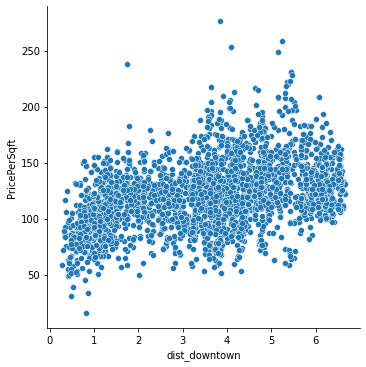

In [191]:
sns.relplot(x="dist_downtown", y="PricePerSqft", data=full_df)

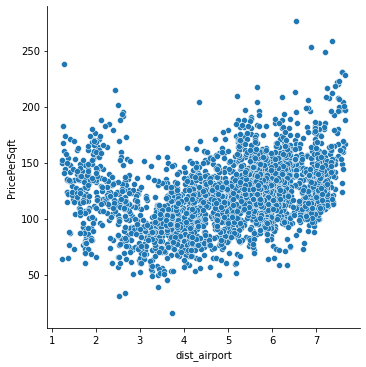

In [192]:
sns.relplot(x="dist_airport", y="PricePerSqft", data=full_df)

<AxesSubplot:xlabel='dist_airport', ylabel='Count'>

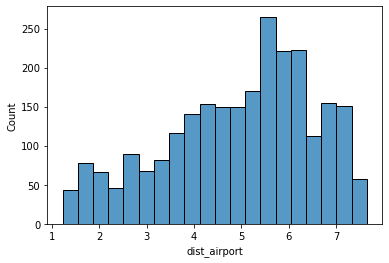

In [193]:
sns.histplot( full_df['dist_airport'])

<AxesSubplot:xlabel='dist_downtown', ylabel='Count'>

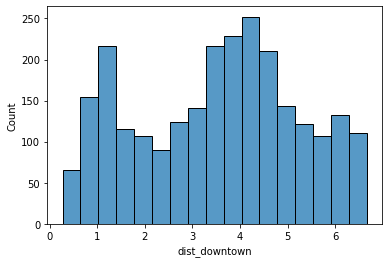

In [194]:
sns.histplot( full_df['dist_downtown'])

<AxesSubplot:xlabel='dist_stadium', ylabel='Count'>

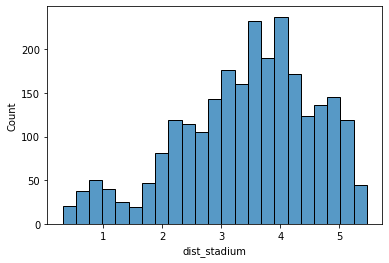

In [195]:
sns.histplot( full_df['dist_stadium'])

In [197]:
distances_df = full_df.copy()
distances_df = full_df[full_df['dist_stadium'].notna()]

(array([  2.,  48., 346., 832., 807., 361., 103.,  29.,   5.,   3.]),
 array([-99.47858775, -75.2534594 , -51.02833106, -26.80320271,
         -2.57807436,  21.64705399,  45.87218234,  70.09731069,
         94.32243904, 118.54756739, 142.77269573]),
 <BarContainer object of 10 artists>)

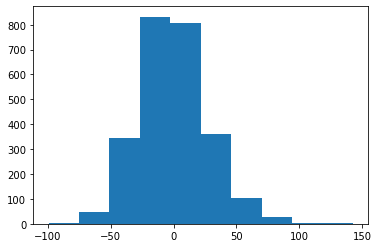

In [199]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

lm = LinearRegression()
lm.fit(distances_df[['dist_stadium']], distances_df['PricePerSqft'])
residuals = distances_df['PricePerSqft'] - lm.predict(distances_df[['dist_stadium']])
plt.hist(residuals)

In [200]:
lm.score(distances_df[['dist_stadium']], distances_df['PricePerSqft'])

0.16255245581461064

(array([ 18., 152., 610., 891., 605., 189.,  52.,  14.,   3.,   2.]),
 array([-86.15631683, -62.22320456, -38.29009229, -14.35698002,
          9.57613225,  33.50924452,  57.44235679,  81.37546906,
        105.30858133, 129.24169361, 153.17480588]),
 <BarContainer object of 10 artists>)

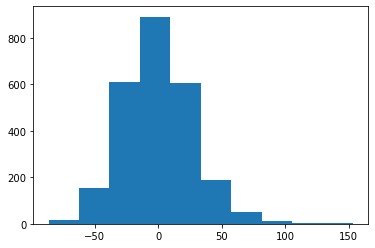

In [201]:
lm2 = LinearRegression()
lm2.fit(distances_df[['dist_downtown']], distances_df['PricePerSqft'])
residuals = distances_df['PricePerSqft'] - lm2.predict(distances_df[['dist_downtown']])
plt.hist(residuals)

In [202]:
lm.score(distances_df[['dist_downtown']], distances_df['PricePerSqft'])

0.1207013457140631

(array([  2.,  59., 402., 863., 750., 315., 106.,  33.,   3.,   3.]),
 array([-97.75941955, -73.4591621 , -49.15890465, -24.85864721,
         -0.55838976,  23.74186768,  48.04212513,  72.34238258,
         96.64264002, 120.94289747, 145.24315491]),
 <BarContainer object of 10 artists>)

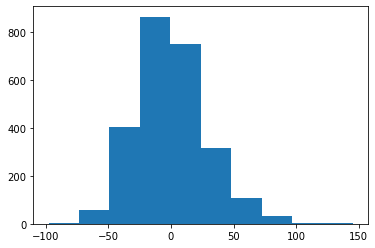

In [203]:
lm3 = LinearRegression()
lm3.fit(distances_df[['dist_airport']], distances_df['PricePerSqft'])
residuals = distances_df['PricePerSqft'] - lm3.predict(distances_df[['dist_airport']])
plt.hist(residuals)

In [204]:
lm3.score(distances_df[['dist_airport']], distances_df['PricePerSqft'])

0.10914081028413836

# Locations imputation 

After obtaining the geocodes for most of the houses, we are imputing the missing values based on the Neighborhood mean. To obtain the location of each house we need the Real Estate Data

In [192]:
raw_data = pd.read_csv('../data/Ames_Housing_Price_Data.csv', index_col=0)

We merge the two data sets on PID/MapRefNo columns

In [193]:
full_df = pd.read_csv('../data/full_wCoord.csv')


In [194]:
new_full = pd.merge(full_df, raw_data[['PID','Neighborhood']],how="left",left_on='PID',
right_on='PID',
sort=True,
suffixes=("_x", "_y"),
copy=False)
new_full.sample(5)

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea_x,Street,Alley,LotShape,...,PA-UntNo,Date,Source,NmbrBRs,coord,dist_stadium,dist_downtown,dist_airport,PricePerSqft,Neighborhood
1444,902301130,1232,114000,70,RM,35.0,4571,Pave,Grvl,Reg,...,NaN,10-Jul-20,Ames City Assessor,3.0,"(42.029261857142856, -93.61826428571428)",2.047131,0.591293,3.383687,92.532468,OldTown
1013,534426110,1041,124500,20,RL,80.0,9600,Pave,NaN,Reg,...,NaN,10-Jul-20,Ames City Assessor,3.0,"(42.04122444683396, -93.62456660627306)",2.928359,2.000079,4.698845,119.596542,NAmes
1323,535457050,925,99000,20,RL,70.0,7000,Pave,NaN,Reg,...,NaN,10-Jul-20,Ames City Assessor,3.0,"(42.034682897959186, -93.60670769387755)",3.159271,1.215716,4.175285,107.027027,NAmes
500,528280110,1647,175000,60,RL,62.0,7917,Pave,NaN,Reg,...,NaN,10-Jul-20,Ames City Assessor,3.0,"(42.0602303, -93.6439316)",4.937524,4.630802,7.036752,106.253795,Gilbert
1348,902101050,1668,135000,50,RM,60.0,9600,Pave,Grvl,Reg,...,NaN,10-Jul-20,Ames City Assessor,3.0,"(42.03348324489796, -93.61720153061225)",2.456166,0.972346,3.859255,80.935252,OldTown


Create lat and lon columns

In [195]:
new = new_full["coord"].str.replace('(', '').str.replace(')', '').str.split(",", n = 1, expand = True)
new_full['lat']= new[0].astype(float)
new_full['lon']= new[1].astype(float)
new_full.sample(5)

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea_x,Street,Alley,LotShape,...,Source,NmbrBRs,coord,dist_stadium,dist_downtown,dist_airport,PricePerSqft,Neighborhood,lat,lon
1124,535155110,1056,139400,20,RL,80.0,9250,Pave,NaN,Reg,...,Ames City Assessor,3.0,"(42.042154469387754, -93.61633851020409)",3.298726,1.905546,4.824519,132.007576,NAmes,42.042154,-93.616339
523,528315030,2392,348000,60,RL,82.0,9452,Pave,NaN,Reg,...,Ames City Assessor,3.0,"(42.05352560673397, -93.65387087303654)",4.410045,4.579396,6.599304,145.484950,NoRidge,42.053526,-93.653871
987,534400030,1128,155000,20,RL,80.0,8700,Pave,NaN,Reg,...,Ames City Assessor,3.0,"(42.041346894343455, -93.62930602362958)",2.842707,2.214170,4.743856,137.411348,NAmes,42.041347,-93.629306
47,527126030,1652,251000,120,RL,41.0,5330,Pave,NaN,Reg,...,Ames City Assessor,2.0,"(42.063184675, -93.634378025)",5.219637,4.559893,7.203528,151.937046,StoneBr,42.063185,-93.634378
602,528439060,1432,245000,20,RL,76.0,9139,Pave,NaN,IR1,...,Ames City Assessor,3.0,"(42.05319491137076, -93.64441004293738)",4.171606,4.019555,6.295418,171.089385,Somerst,42.053195,-93.644410


Remove neighborhoods outside of the city limits

In [196]:
new_full = new_full.loc[~new_full['Neighborhood'].isin(['Landmrk','GrnHill','Greens'])]
new_full['Neighborhood'].value_counts()

NAmes      417
CollgCr    240
OldTown    217
Edwards    169
Somerst    145
Gilbert    145
Sawyer     141
NWAmes     124
NridgHt    123
SawyerW    114
Mitchel    105
BrkSide    104
Crawfor     96
IDOTRR      80
NoRidge     67
Timber      54
StoneBr     45
SWISU       42
ClearCr     40
MeadowV     38
BrDale      30
Blmngtn     23
NPkVill     23
Veenker     23
Blueste     10
Name: Neighborhood, dtype: int64

Impute the Blueste neighborhood manually because geopy did not find it. We found the coords in Google Maps

In [197]:
new_full.loc[new_full['Neighborhood'] == 'Blueste', 'coord']= '(42.010219, -93.645814)'
new_full.loc[new_full['Neighborhood'] == 'Blueste', 'lat']= 42.010219
new_full.loc[new_full['Neighborhood'] == 'Blueste', 'lon']= -93.645814
new_full.loc[new_full['Neighborhood'] == 'Blueste']

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea_x,Street,Alley,LotShape,...,Source,NmbrBRs,coord,dist_stadium,dist_downtown,dist_airport,PricePerSqft,Neighborhood,lat,lon
2355,909451020,1032,116500,160,RM,24.0,1879,Pave,NaN,Reg,...,Ames City Assessor,2.0,"(42.010219, -93.645814)",NaN,NaN,NaN,112.887597,Blueste,42.010219,-93.645814
2356,909451040,1032,115000,160,RM,24.0,1733,Pave,NaN,Reg,...,Ames City Assessor,2.0,"(42.010219, -93.645814)",NaN,NaN,NaN,111.434109,Blueste,42.010219,-93.645814
2357,909451100,1229,137000,160,RM,24.0,1488,Pave,NaN,Reg,...,Ames City Assessor,2.0,"(42.010219, -93.645814)",NaN,NaN,NaN,111.472742,Blueste,42.010219,-93.645814
2358,909451130,1045,123900,160,RM,24.0,1782,Pave,NaN,Reg,...,Ames City Assessor,2.0,"(42.010219, -93.645814)",NaN,NaN,NaN,118.564593,Blueste,42.010219,-93.645814
2359,909451140,1229,121000,160,RM,24.0,1612,Pave,NaN,Reg,...,Ames City Assessor,2.0,"(42.010219, -93.645814)",NaN,NaN,NaN,98.454028,Blueste,42.010219,-93.645814
2360,909451150,1556,151000,160,RM,24.0,1950,Pave,NaN,Reg,...,Ames City Assessor,3.0,"(42.010219, -93.645814)",NaN,NaN,NaN,97.043702,Blueste,42.010219,-93.645814
2361,909451180,1229,124000,160,RM,24.0,1300,Pave,NaN,Reg,...,Ames City Assessor,2.0,"(42.010219, -93.645814)",NaN,NaN,NaN,100.895037,Blueste,42.010219,-93.645814
2366,909455030,1034,185000,120,RM,35.0,3907,Pave,NaN,IR1,...,Ames City Assessor,1.0,"(42.010219, -93.645814)",NaN,NaN,NaN,178.916828,Blueste,42.010219,-93.645814
2367,909455040,1191,162500,120,RM,35.0,3907,Pave,NaN,IR1,...,Ames City Assessor,2.0,"(42.010219, -93.645814)",NaN,NaN,NaN,136.439966,Blueste,42.010219,-93.645814
2368,909455060,1020,200000,120,RM,35.0,3907,Pave,NaN,IR1,...,Ames City Assessor,1.0,"(42.010219, -93.645814)",NaN,NaN,NaN,196.078431,Blueste,42.010219,-93.645814


Impute lat and lon based off the neighborhood mean  

In [198]:
new_full['lat'] = new_full['lat'].fillna(new_full.groupby('Neighborhood')['lat'].transform('mean'))
new_full['lon'] = new_full['lon'].fillna(new_full.groupby('Neighborhood')['lon'].transform('mean'))

In [209]:
new_full.loc[new_full['coord'] == 'nan ,nan', 'coord']= '('+new_full['lat'].astype(str) + ' ,' + new_full['lon'].astype(str)+')'
new_full['coord'] = new_full['coord'].fillna('('+new_full['lat'].astype(str) + ' ,' + new_full['lon'].astype(str)+')')
new_full['coord'].value_counts()

(42.022102880518695 ,-93.6668015980319)     14
(42.0602303, -93.6439316)                   12
(42.052547, -93.628226)                     12
(42.06018872662157 ,-93.6534178327045)      11
(42.010219, -93.645814)                     10
                                            ..
(42.04711721032323, -93.6423784426502)       1
(41.99713698687289, -93.6072027855146)       1
(42.049460411604926, -93.63618913624374)     1
(42.009164086706505, -93.61611797708161)     1
(42.05319988784583, -93.64329328050945)      1
Name: coord, Length: 2430, dtype: int64

Now determine the distances between each of the areas of interest and the houses

In [222]:
JackTriceStadium = '42.0162027, -93.6357060'
Downtown = '42.0251029, -93.6138075'
Airport = '41.9989524, -93.6223669'

In [230]:
print(new_full.iloc[0]['lat'].astype(str) +',' +new_full.iloc[0]['lon'].astype(str))

42.053808,-93.618344


In [231]:
from geopy import distance
dist = distance.distance((new_full.iloc[0]['lat'].astype(str) +',' +new_full.iloc[0]['lon'].astype(str)), JackTriceStadium ).km
dist

4.4174608168370755

In [ ]:
dist_stadium = []
for co in range(0,len(new_full)):
    try:
        dist = distance.distance((new_full.iloc[co]['lat'].astype(str) +',' +new_full.iloc[co]['lon'].astype(str)), JackTriceStadium ).km
    except:
        dist = None
    dist_stadium.append(dist)

In [ ]:
dist_downtown = []
for co in range(0,len(new_full)):
    try:
        dist = distance.distance((new_full.iloc[co]['lat'].astype(str) +',' +new_full.iloc[co]['lon'].astype(str)), Downtown ).km
    except:
        dist = None
    dist_downtown.append(dist)

In [ ]:
dist_airport = []
for co in range(0,len(new_full)):
    try:
        dist = distance.distance((new_full.iloc[co]['lat'].astype(str) +',' +new_full.iloc[co]['lon'].astype(str)), Airport ).km
    except:
        dist = None
    dist_airport.append(dist)

In [ ]:
dist_airport = []
for co in range(0,len(new_full)):
    try:
        dist = distance.distance((new_full.iloc[co]['lat'].astype(str) +',' +new_full.iloc[co]['lon'].astype(str)), Airport ).km
    except:
        dist = None
    dist_airport.append(dist)
    
dist_airport

In [ ]:
new_full['dist_stadium']= dist_stadium
new_full['dist_downtown']= dist_downtown
new_full['dist_airport']= dist_airport

In [ ]:
full_latlon= new_full[['PID', 'lat', 'lon','dist_stadium','dist_downtown', 'dist_airport', 'coord' ]]

In [250]:
full_latlon.shape

(2615, 7)

In [ ]:
full_latlon.to_csv(r'../data/full_latlon.csv', index = False)